module 'kv_template' has no attribute 'dataset_info'
Loaded dataset with 1427 elements
loading model: /root/autodl-fs/llama-2-7b-hf


INFO:accelerate.utils.modeling:We will use 90% of the memory on device 0 for storing the model, and 10% for the buffer to avoid OOM. You can set `max_memory` in to a higher value to use more memory (at your own risk).


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/root/autodl-fs/llama-2-7b-hf model loaded
{'output': 'Franche-Comté', 'image': [{'image_name': 'Attribution score for output', 'image_path': '/root/interpret-lm/util/tmp/0ml0y_89.png', 'image_des': "The graph above represents the attribution score of the input prompt's tokens on predicting the tokens in the ground truth.", 'image_res': 'The attribution scores for the top 3 input-output pairs are: \ncountry->-, <s>->-, h->-.'}], 'origin_data': {'Attribution': [[0.7024008436253139, 0.7024552948384224, 0.7139440289537468, 0.6958470728903083, 0.697624792217195, 0.6989158231572494, 0.7106808916852007, 0.7090734354481605, 0.7275875505361273, 0.7113534389747609, 0.7011294523016477, 0.7059522573398037, 0.7091529714234671, 0.6908523165368144, 0.6879917016154251, 0.7066242864756975, 0.7047456016608106, 0.7118556751564518], [0.709265885804502, 0.6800852019256254, 0.7055631660746561, 0.7091990496163136, 0.7119158505588812, 0.7073723685653027, 0.6996082396187464, 0.7024577998602844, 0.711370710763

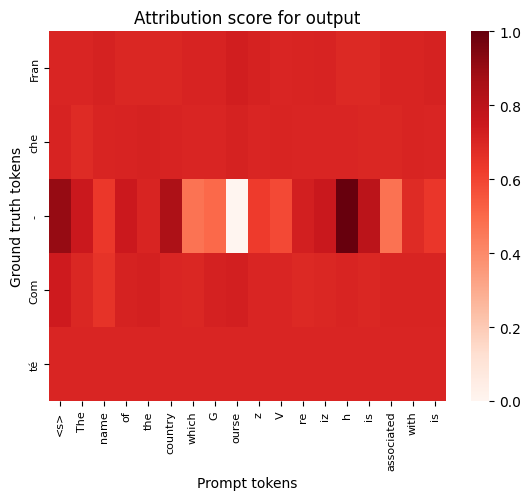

In [1]:
from diagnose import diagnose
from dataset_process import knowns, ZsRE, counterfact
from models import llama, gptj, gpt2, qwen
from methods import attribution_integrated_grads

# dataset = knowns.KnownsDataset(loc=knowns.default_loc)
# sample = knowns.get_processed_kvs(dataset[0], kn.requires_input_keys)
# dataset = ZsRE.ZsREDataset(loc=ZsRE.default_loc)
# sample = ZsRE.get_processed_kvs(dataset[0], kn.requires_input_keys)
dataset = counterfact.CounterfactDataset(loc=counterfact.default_loc)
sample = counterfact.get_processed_kvs(dataset[0], attribution_integrated_grads.requires_input_keys)
result = diagnose.diagnosing(sample=sample, model_name_or_path=llama, method=attribution_integrated_grads.name)

print(result)

